# Functional connectivity

Functional connectivity measures to what extent two brain regions are synchronized with each other.
It is usually quantified using the Pearson correlation between their time series.

In [1]:
import numpy as np
import neuroboros as nb
from scipy.spatial.distance import pdist, cdist, squareform
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [2]:
dset = nb.Budapest()
sids = dset.subjects

In [3]:
dm_ico32 = dset.get_data(sids[0], 'budapest', 1, 'l')

In [4]:
dm_ico32.shape

(598, 9675)

In this example, we compute fine-grained vertex-by-vertex connectivity.

To avoid a large amount of computations, we downsample the data matrix from ico32 resolution (10,242 vertices prior to masking) to ico8 resolution (642 vertices prior to masking).

In [5]:
xfm = nb.mapping('l', 'onavg-ico32', 'onavg-ico8', mask=True)

In [6]:
xfm.shape

(9675, 603)

In [7]:
dm = dm_ico32 @ xfm

In [8]:
print(dm_ico32.shape, xfm.shape, dm.shape)

(598, 9675) (9675, 603) (598, 603)


Using `xfm` obtained from `nb.mapping`, the data matrix is downsampled from 9675 vertices to 603 vertices.

The connectivity matrix has the shape of $n_v \times n_v$, in this case, it's 603×603.
Note that different from computing RDM, here we use the transpose of `dm` (`dm.T`)instead of `dm` itself.

Each entry in the functional connectivity matrix is the correlation between two vertices' time series, and therefore it's one minus correlation distance:

$$ r = 1 - \text{correlation distance} $$

In [9]:
d = pdist(dm.T, 'correlation')
mat = 1 - squareform(d)
print(d.shape, mat.shape)

(181503,) (603, 603)


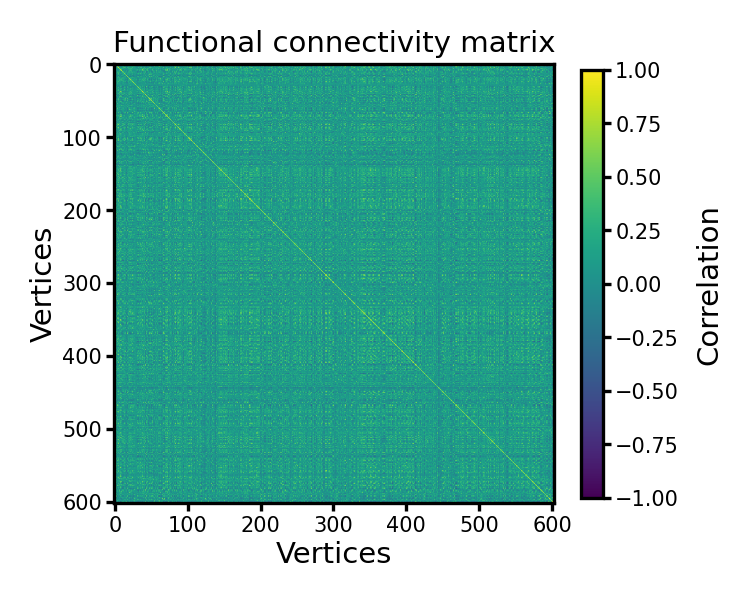

In [10]:
fig, ax = plt.subplots(1, 1, figsize=[_/2.54 for _ in [6, 6]], dpi=300)
im = ax.imshow(mat, vmax=1, vmin=-1, cmap='viridis')

ax.set_title('Functional connectivity matrix', size=7, pad=3)
ax.tick_params('both', labelsize=5, size=2, pad=1)
ax.set_xlabel('Vertices', size=7, labelpad=1)
ax.set_ylabel('Vertices', size=7, labelpad=1)
cb = fig.colorbar(im, ax=ax, shrink=0.8)
cb.ax.tick_params(labelsize=5, size=2, pad=1)
cb.ax.set_ylabel('Correlation', size=7)
plt.show()